In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split


In [3]:
# sigmoid "logistic" function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
features = []
labels = []
# load data
import csv
with open("Invistico_airline.csv") as file:
    headers = next(file)
    X = np.array(list(csv.reader(file)),dtype=float)




"""
satisfied :1 , dissatisfied:0
loyal :1 disloyal:0
personal Travel : 1 businnes travel:0
businnes:2 , Eco Plus:1 , Eco:0
"""

# first column is the label data
Y = X[:,0]

# # delete the last column
X = np.delete(X, 0, axis=1)

# # add the x0 column for the bias
X = np.insert(X,0,1,axis=1)

In [5]:
# normalize data
X = X / X.max(axis=0)


In [66]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
y_train = np.reshape(y_train,newshape=(y_train.shape[0],1))
y_test = np.reshape(y_test,newshape=(y_test.shape[0],1))


In [81]:
EPOCHS = 3000
# NOTE: added lambda which is the regularization hyperparameter
LAMBDA = 100
learning_rate = 0.01
M = len(x_train)
N = len(x_train[0])

In [82]:
hypothesis = lambda THETA: sigmoid(x_train @ THETA)

In [83]:
cost = lambda hypo,THETA,LAMBDA: (-1 / M ) * np.sum(y_train*np.log(hypo) + (1-y_train)*np.log(1-hypo)) + LAMBDA / (2 * M) * (THETA.T @ THETA)[0][0]

In [84]:
gradients = lambda error,THETA,LAMBDA: 1/M * x_train.T @ error + LAMBDA / M * THETA

In [85]:
# initialize weights
THETA = np.ones(shape=(N,1))
THETA = THETA * 0.5


costs = []
for epoch in range(EPOCHS):
    A = hypothesis(THETA)
    
    # calculate average cost
    costs.append(cost(A,THETA,LAMBDA))

    error = A - y_train
    # this is the overall derivative of each weight
    GRADS =  gradients(error,THETA,LAMBDA)
    # update the weights

    THETA = THETA - learning_rate * GRADS


In [86]:


# prediction 
# decision boundary will be 0.7


# calculate the outputs of the all the testing set
PREDICTIONS = sigmoid(x_test @ THETA)


In [87]:
# check if the prediction is less than 0.7 consider as 0 else consider as 1

for i in range(len(PREDICTIONS)):
    if PREDICTIONS[i] < 0.5:
        PREDICTIONS[i] = 0
    else:
        PREDICTIONS[i] = 1


In [88]:
correct = np.sum(PREDICTIONS == np.reshape(y_test,newshape=(y_test.shape[0],1)))
correct

451

In [89]:
round((correct/PREDICTIONS.shape[0]) * 100,ndigits=2)

89.48

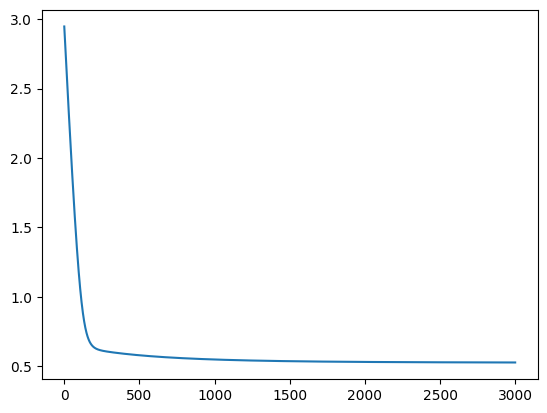

In [90]:
plt.plot(costs)